<a href="https://colab.research.google.com/github/AlexsonT/Machine-Learning/blob/main/Atividade_Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas

In [84]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [85]:
# bibliotecas e configurações para utilizar o plotly no Colab.
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
import cufflinks as cf # para conectar o plotly ao pandas
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

Funções

In [143]:

def plotar_grafico_histograma(df):
    fig = px.histogram(df)
    fig.show()
  
    
def plotar_grafico_boxplot(df):
    sns.boxplot(df)


def filtro_quartil_amplitude(df):
    
    print("Mínimo ANTES do filtro: ", min(df['coluna_avaliada']))
    print("Máximo ANTES do filtro: ", max(df['coluna_avaliada']))
    print("Total de dados ANTES do filtro: ", (df['coluna_avaliada']).count())
    
    print("")
    
    Q1 = df['coluna_avaliada'].quantile(0.25)
    Q2 = df['coluna_avaliada'].quantile(0.5)
    Q3 = df['coluna_avaliada'].quantile(0.75)
    
    Amp_interquartil = Q3 - Q1
    
    limite_inferior = (Q1 - (1.5 * Amp_interquartil))
    
    limite_superior = (Q3 + (1.5 * Amp_interquartil))
    
    df_mask=df['coluna_avaliada']>limite_inferior
    amplitudePos = df[df_mask]
    
    df_mask=amplitudePos['coluna_avaliada']<limite_superior
    df_final = amplitudePos[df_mask]
    
    print("Mínimo DEPOIS do filtro: ", min(df_final['coluna_avaliada']))
    print("Máximo DEPOIS do filtro: ", max(df_final['coluna_avaliada']))
    print("Total de dados DEPOIS do filtro: ", (df_final['coluna_avaliada']).count())
    
    return df_final

Lendo o dataframe

In [112]:
df = pd.read_csv('car_ad.csv', sep=',')

Verificando algumas informações e dados do dataset

In [113]:
df.shape # o dataframe possui 9576 linhas e 10 colunas.

(9576, 10)

In [114]:
df.head(10) #verificando as primeiras as últimas linhas já é possível observar NaN em mais de uma coluna.

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [115]:
df.tail(10) # analisando as últimas 10 linhas.

,car,price,body,mileage,engV,engType,registration,year,model,drive
9566,UAZ,850.0,van,255,NaN,Other,yes,1981,3962,NaN
9567,Jeep,13990.0,crossover,210,3.0,Diesel,yes,2006,Grand Cherokee,full
9568,Mercedes-Benz,5000.0,vagon,248,2.0,Gas,yes,1996,E-Class,rear
9569,Volkswagen,18000.0,crossover,155,2.0,Diesel,yes,2011,Tiguan,full
9570,Toyota,14474.0,crossover,115,2.0,Petrol,yes,2007,Rav 4,full
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [116]:
df.dtypes #verificando a tipagem dos dados.

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

Criando novas colunas e ajustando o dataset.

In [117]:
df.insert(0, 'classe', df['body'])
df.insert(1, 'carros', df['car'])
df.insert(2, 'modelo', df['model'])
df.insert(3, 'tracao', df['drive'])

In [118]:
df1 = df.iloc[:, 0:4]

In [119]:
df1.insert(4, 'classe_n', df['body'])
df1.insert(5, 'carros_n', df['car'])
df1.insert(6, 'modelo_n', df['model'])
df1.insert(7, 'tracao_n', df['drive'])

In [120]:
df1['classe'].unique() #verificando quais são os tipos de carros no dataset.

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

Transformando os valores do dataset em valores numéricos

In [121]:
label_encoder = preprocessing.LabelEncoder() # sklearn
  
df1['classe_n'] = label_encoder.fit_transform(df1['classe'])
df1['carros_n'] = label_encoder.fit_transform(df1['carros'])
df1['modelo_n'] = label_encoder.fit_transform(df1['modelo'])
df1['tracao_n'] = label_encoder.fit_transform(df1['tracao'])

In [122]:
#Exibindo as classes em valor. 0 = 'crossover', 1 = 'hatch', 2 = 'other', 3 = 'sedan', 4 = 'vagon', 5 = 'van'.
df1['classe_n'].unique()

array([0, 3, 2, 5, 4, 1])

In [123]:
df1.head(8)

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
0,crossover,Ford,Kuga,full,0,26,496,1
1,sedan,Mercedes-Benz,E-Class,rear,3,53,336,2
2,other,Mercedes-Benz,CL 550,rear,2,53,244,2
3,van,Mercedes-Benz,B 180,front,5,53,210,0
4,vagon,Mercedes-Benz,E-Class,NaN,4,53,336,3
5,crossover,Nissan,X-Trail,full,0,58,852,1
6,sedan,Honda,Accord,front,3,33,182,0
7,vagon,Renault,Megane,front,4,63,566,0


In [124]:
df1.dtypes

classe      object
carros      object
modelo      object
tracao      object
classe_n     int64
carros_n     int64
modelo_n     int64
tracao_n     int64
dtype: object

Verificando as estatísticas do dataframe.

In [125]:
df1.describe(include='all') 

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
count,9576,9576,9576,9065,9576.000000,9576.000000,9576.000000,9576.000000
unique,6,87,888,3,NaN,NaN,NaN,NaN
top,sedan,Volkswagen,E-Class,front,NaN,NaN,NaN,NaN
freq,3646,936,199,5188,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.297306,49.462615,454.734336,0.708751
std,NaN,NaN,NaN,NaN,1.604711,25.617122,253.625660,0.902373
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,27.000000,228.000000,0.000000
50%,NaN,NaN,NaN,NaN,3.000000,53.000000,486.000000,0.000000
75%,NaN,NaN,NaN,NaN,3.000000,72.000000,656.000000,1.000000


Verificando valores vazios do dataframe

In [126]:
print(df1.isna().sum())

classe        0
carros        0
modelo        0
tracao      511
classe_n      0
carros_n      0
modelo_n      0
tracao_n      0
dtype: int64


In [127]:
print(df1.isnull().sum())

classe        0
carros        0
modelo        0
tracao      511
classe_n      0
carros_n      0
modelo_n      0
tracao_n      0
dtype: int64


Tratar valores vazios (exclusão)

In [128]:
df1_sem_nan = df1.dropna()

In [129]:
print(df1_sem_nan.isna().sum())

classe      0
carros      0
modelo      0
tracao      0
classe_n    0
carros_n    0
modelo_n    0
tracao_n    0
dtype: int64


In [130]:
df1_sem_nan.describe() 

,classe_n,carros_n,modelo_n,tracao_n
count,9065.000000,9065.000000,9065.000000,9065.000000
mean,2.285935,49.475565,454.939658,0.579592
std,1.611167,25.631591,252.735140,0.739954
min,0.000000,0.000000,1.000000,0.000000
25%,1.000000,27.000000,228.000000,0.000000
50%,3.000000,53.000000,487.000000,0.000000
75%,3.000000,72.000000,654.000000,1.000000
max,5.000000,86.000000,887.000000,2.000000


Análise exploratória via gráficos e dados estatísticos

In [131]:
plotar_grafico_histograma(df1_sem_nan["classe"]) #Há uma disparidade entre os tipos de carro.

In [132]:
plotar_grafico_histograma(df1_sem_nan['carros'])

In [133]:
plotar_grafico_histograma(df1_sem_nan['modelo'])

In [134]:
plotar_grafico_histograma(df1_sem_nan['tracao'])

Dividindo o dataframe para analisar as classes de forma independente

In [135]:
df_mask = df1_sem_nan['classe_n'] == 0
df_crossover = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 1
df_hatch = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 2
df_other = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 3
df_sedan = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 4
df_vagon = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 5
df_van = df1_sem_nan[df_mask]

# Análise dos **dataframes**

## **Crossover**

In [136]:
df_crossover.iplot(kind='hist')

## **Hatch**

In [137]:
df_hatch.iplot(kind='hist')

## **Other**

In [138]:
df_other.iplot(kind='hist')

## **Sedan**

In [139]:
df_sedan.iplot(kind='hist')

## **Vagon**

In [140]:
df_vagon.iplot(kind='hist')

## **Van**

In [141]:
df_van.iplot(kind='hist')

Exclusão de Outliers (quartil)

Mínimo ANTES do filtro:  0
Máximo ANTES do filtro:  86
Total de dados ANTES do filtro:  1998

Mínimo DEPOIS do filtro:  0
Máximo DEPOIS do filtro:  86
Total de dados DEPOIS do filtro:  1998


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



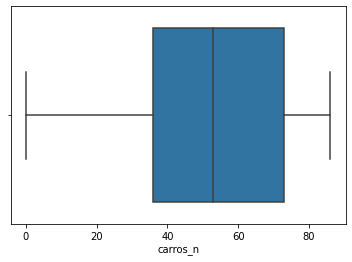

In [144]:
# Crossover - marca 

df_crossover_pre_filtro = df_crossover.iloc[:, 4:]
df_crossover_pre_filtro.columns = ['classe_n', 'coluna_avaliada', 'modelo_n', 'tracao_n']

df_crossover_filtrado = filtro_quartil_amplitude(df_crossover_pre_filtro)

df_crossover_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_crossover_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_crossover_filtrado["carros_n"])

plotar_grafico_histograma(df_crossover_filtrado["carros_n"])


Mínimo ANTES do filtro:  2
Máximo ANTES do filtro:  885
Total de dados ANTES do filtro:  1998

Mínimo DEPOIS do filtro:  2
Máximo DEPOIS do filtro:  885
Total de dados DEPOIS do filtro:  1998


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



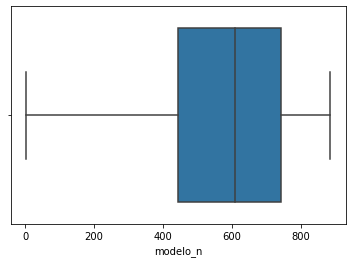

In [145]:
# Crossover - modelo

df_crossover_pre_filtro = df_crossover.iloc[:, 4:]
df_crossover_pre_filtro.columns = ['classe_n', 'carros_n', 'coluna_avaliada', 'tracao_n']

df_crossover_filtrado = filtro_quartil_amplitude(df_crossover_pre_filtro)

df_crossover_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_crossover_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_crossover_filtrado['modelo_n'])

plotar_grafico_histograma(df_crossover_filtrado['modelo_n'])

Mínimo ANTES do filtro:  1
Máximo ANTES do filtro:  84
Total de dados ANTES do filtro:  1195

Mínimo DEPOIS do filtro:  1
Máximo DEPOIS do filtro:  84
Total de dados DEPOIS do filtro:  1195


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



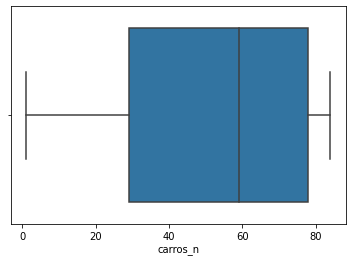

In [146]:
# Hatch - marca 

df_hatch_pre_filtro = df_hatch.iloc[:, 4:]
df_hatch_pre_filtro.columns = ['classe_n', 'coluna_avaliada', 'modelo_n', 'tracao_n']

df_hatch_filtrado = filtro_quartil_amplitude(df_hatch_pre_filtro)

df_hatch_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_hatch_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_hatch_filtrado["carros_n"])

plotar_grafico_histograma(df_hatch_filtrado["carros_n"])

Mínimo ANTES do filtro:  3
Máximo ANTES do filtro:  887
Total de dados ANTES do filtro:  1195

Mínimo DEPOIS do filtro:  3
Máximo DEPOIS do filtro:  887
Total de dados DEPOIS do filtro:  1195


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



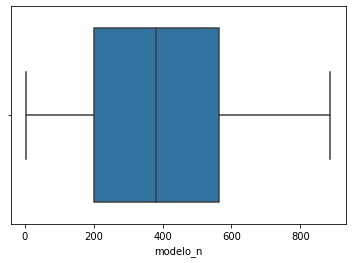

In [147]:
# Hatch - modelo

df_hatch_pre_filtro = df_hatch.iloc[:, 4:]
df_hatch_pre_filtro.columns = ['classe_n', 'carros_n', 'coluna_avaliada', 'tracao_n']

df_hatch_filtrado = filtro_quartil_amplitude(df_hatch_pre_filtro)

df_hatch_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_hatch_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_hatch_filtrado['modelo_n'])

plotar_grafico_histograma(df_crossover_filtrado['modelo_n'])

Mínimo ANTES do filtro:  3
Máximo ANTES do filtro:  86
Total de dados ANTES do filtro:  752

Mínimo DEPOIS do filtro:  3
Máximo DEPOIS do filtro:  86
Total de dados DEPOIS do filtro:  752


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



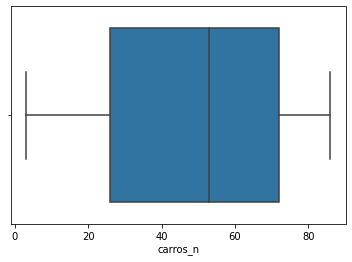

In [148]:
# Other - marca 

df_other_pre_filtro = df_other.iloc[:, 4:]
df_other_pre_filtro.columns = ['classe_n', 'coluna_avaliada', 'modelo_n', 'tracao_n']

df_other_filtrado = filtro_quartil_amplitude(df_other_pre_filtro)

df_other_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_other_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_other_filtrado["carros_n"])

plotar_grafico_histograma(df_other_filtrado["carros_n"])

Mínimo ANTES do filtro:  3
Máximo ANTES do filtro:  882
Total de dados ANTES do filtro:  752

Mínimo DEPOIS do filtro:  3
Máximo DEPOIS do filtro:  882
Total de dados DEPOIS do filtro:  752


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



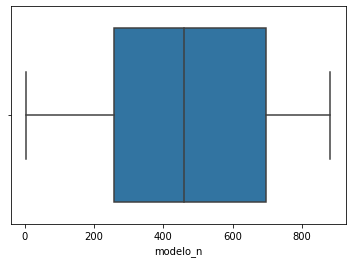

In [149]:
# Other - modelo

df_other_pre_filtro = df_other.iloc[:, 4:]
df_other_pre_filtro.columns = ['classe_n', 'carros_n', 'coluna_avaliada', 'tracao_n']

df_other_filtrado = filtro_quartil_amplitude(df_other_pre_filtro)

df_other_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_other_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_other_filtrado['modelo_n'])

plotar_grafico_histograma(df_other_filtrado['modelo_n'])

Mínimo ANTES do filtro:  0
Máximo ANTES do filtro:  84
Total de dados ANTES do filtro:  3444

Mínimo DEPOIS do filtro:  0
Máximo DEPOIS do filtro:  84
Total de dados DEPOIS do filtro:  3444


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



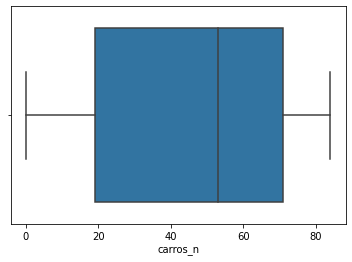

In [150]:
# Sedan - marca 

df_sedan_pre_filtro = df_sedan.iloc[:, 4:]
df_sedan_pre_filtro.columns = ['classe_n', 'coluna_avaliada', 'modelo_n', 'tracao_n']

df_sedan_filtrado = filtro_quartil_amplitude(df_sedan_pre_filtro)

df_sedan_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_sedan_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_sedan_filtrado["carros_n"])

plotar_grafico_histograma(df_sedan_filtrado["carros_n"])

Mínimo ANTES do filtro:  1
Máximo ANTES do filtro:  886
Total de dados ANTES do filtro:  3444

Mínimo DEPOIS do filtro:  1
Máximo DEPOIS do filtro:  886
Total de dados DEPOIS do filtro:  3444


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



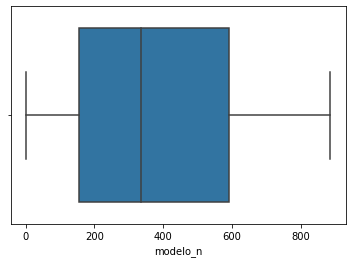

In [151]:
# Sedan - modelo

df_sedan_pre_filtro = df_sedan.iloc[:, 4:]
df_sedan_pre_filtro.columns = ['classe_n', 'carros_n', 'coluna_avaliada', 'tracao_n']

df_sedan_filtrado = filtro_quartil_amplitude(df_sedan_pre_filtro)

df_sedan_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_sedan_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_sedan_filtrado['modelo_n'])

plotar_grafico_histograma(df_sedan_filtrado['modelo_n'])

Mínimo ANTES do filtro:  1
Máximo ANTES do filtro:  84
Total de dados ANTES do filtro:  689

Mínimo DEPOIS do filtro:  1
Máximo DEPOIS do filtro:  84
Total de dados DEPOIS do filtro:  689


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



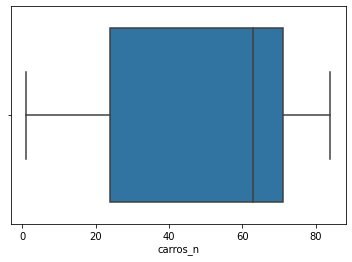

In [152]:
# Vagon - marca 

df_vagon_pre_filtro = df_vagon.iloc[:, 4:]
df_vagon_pre_filtro.columns = ['classe_n', 'coluna_avaliada', 'modelo_n', 'tracao_n']

df_vagon_filtrado = filtro_quartil_amplitude(df_vagon_pre_filtro)

df_vagon_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_vagon_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_vagon_filtrado["carros_n"])

plotar_grafico_histograma(df_vagon_filtrado["carros_n"])

Mínimo ANTES do filtro:  7
Máximo ANTES do filtro:  882
Total de dados ANTES do filtro:  689

Mínimo DEPOIS do filtro:  7
Máximo DEPOIS do filtro:  882
Total de dados DEPOIS do filtro:  689


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



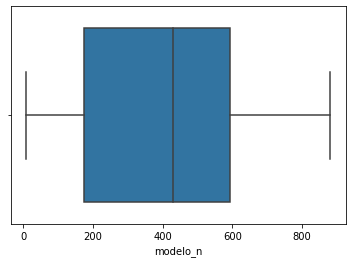

In [153]:
# Vagon - modelo

df_vagon_pre_filtro = df_vagon.iloc[:, 4:]
df_vagon_pre_filtro.columns = ['classe_n', 'carros_n', 'coluna_avaliada', 'tracao_n']

df_vagon_filtrado = filtro_quartil_amplitude(df_vagon_pre_filtro)

df_vagon_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_vagon_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_vagon_filtrado['modelo_n'])

plotar_grafico_histograma(df_vagon_filtrado['modelo_n'])

Mínimo ANTES do filtro:  14
Máximo ANTES do filtro:  84
Total de dados ANTES do filtro:  987

Mínimo DEPOIS do filtro:  14
Máximo DEPOIS do filtro:  84
Total de dados DEPOIS do filtro:  987


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



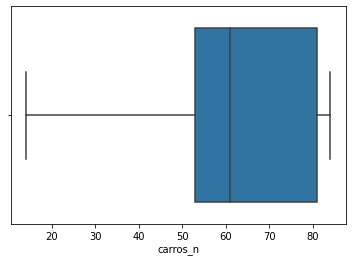

In [154]:
# Van - marca 

df_van_pre_filtro = df_van.iloc[:, 4:]
df_van_pre_filtro.columns = ['classe_n', 'coluna_avaliada', 'modelo_n', 'tracao_n']

df_van_filtrado = filtro_quartil_amplitude(df_van_pre_filtro)

df_van_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_van_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_van_filtrado["carros_n"])

plotar_grafico_histograma(df_van_filtrado["carros_n"])

Mínimo ANTES do filtro:  9
Máximo ANTES do filtro:  879
Total de dados ANTES do filtro:  987

Mínimo DEPOIS do filtro:  9
Máximo DEPOIS do filtro:  879
Total de dados DEPOIS do filtro:  987


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



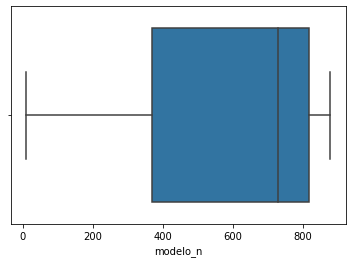

In [155]:
# Van - modelo

df_van_pre_filtro = df_van.iloc[:, 4:]
df_van_pre_filtro.columns = ['classe_n', 'carros_n', 'coluna_avaliada', 'tracao_n']

df_van_filtrado = filtro_quartil_amplitude(df_van_pre_filtro)

df_van_pre_filtro.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

df_van_filtrado.columns = ['classe_n', 'carros_n', 'modelo_n', 'tracao_n']

plotar_grafico_boxplot(df_van_filtrado['modelo_n'])

plotar_grafico_histograma(df_van_filtrado['modelo_n'])

Unificando o dataframe

In [156]:
df_final = pd.concat([df_crossover, df_hatch, df_other, df_sedan, df_vagon, df_van], ignore_index = True)

In [157]:
df_final['classe_n'].unique() #verificando a unificação.

array([0, 1, 2, 3, 4, 5])

In [158]:
df_final.head()

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
0,crossover,Ford,Kuga,full,0,26,496,1
1,crossover,Nissan,X-Trail,full,0,58,852,1
2,crossover,Nissan,Qashqai,front,0,58,656,0
3,crossover,Mercedes-Benz,GLE-Class,full,0,53,406,1
4,crossover,Nissan,X-Trail,full,0,58,852,1


APLICANDO SMOTE PARA BALANCEAR OS DADOS CONFORME AS CLASSES  Dividir o dataset em dados de treino e teste, aqui foi utilizado 30% para teste e 70% para treinamento

In [159]:
df_final_SEM_classe = df_final.iloc[:,5:]
df_final_SOMENTE_classe = df_final.iloc[:,4:5]

Normalizando os dados

In [160]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()  
scaler.fit(df_final_SEM_classe)
df_final_SEM_classe_NORMALIZADO = scaler.transform(df_final_SEM_classe)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(df_final_SEM_classe_NORMALIZADO, df_final_SOMENTE_classe, test_size = 0.3, random_state = 0)

Verificando quantas classes tem o dataset atual

In [162]:
quantidade_classes = y_train['classe_n'].value_counts()
print(quantidade_classes)

3    2407
0    1407
1     820
5     704
2     527
4     480
Name: classe_n, dtype: int64


Aplicando o SMOTE

In [163]:
oversample = SMOTE()
X_train_Smote, y_train_Smote = oversample.fit_resample(X_train, y_train)


Verificando quantas classes tem o novo dataset

In [164]:
quantidade_classes = y_train_Smote['classe_n'].value_counts()
print(quantidade_classes)


1    2407
0    2407
3    2407
4    2407
5    2407
2    2407
Name: classe_n, dtype: int64


Criando e treinando o modelo

In [165]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

knn_model = KNeighborsRegressor(n_neighbors=3)


knn_model.fit(X_train_Smote, y_train_Smote)


y_pred  = knn_model.predict(X_test)


Avaliando o modelo

In [166]:
y_pred = pd.DataFrame(y_pred)

y_pred = y_pred.astype(int)

print(classification_report(y_pred, y_test))


from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_pred, y_test)

print(matriz)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       557
           1       0.57      0.57      0.57       378
           2       0.31      0.16      0.21       427
           3       0.75      0.74      0.75      1046
           4       0.12      0.15      0.14       175
           5       0.37      0.77      0.50       137

    accuracy                           0.63      2720
   macro avg       0.50      0.56      0.51      2720
weighted avg       0.63      0.63      0.62      2720

[[525   1  21   3   7   0]
 [ 41 215  27  67  22   6]
 [ 14 101  70 179  54   9]
 [  9  48  66 779  90  54]
 [  2  10  23   6  26 108]
 [  0   0  18   3  10 106]]


Exibindo uma Mtriz Confusão compreensível.

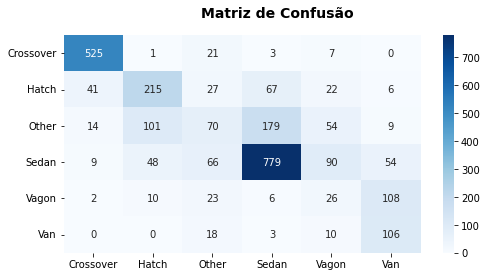

In [167]:
# 0 = 'crossover', 1 = 'hatch', 2 = 'other', 3 = 'sedan', 4 = 'vagon', 5 = 'van'


fig = plt.figure(figsize=(8,4))
fig.suptitle('Matriz de Confusão ', fontsize=14, fontweight='bold')
labels = ['Crossover', 'Hatch', 'Other', 'Sedan', 'Vagon', 'Van']
sns.heatmap(matriz,annot=True, fmt="d",cmap='Blues',xticklabels=labels, yticklabels= labels)